In [158]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/ECE5242_AutonomousSystems/ECE5242Proj4/

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/ECE5242_AutonomousSystems/ECE5242Proj4


In [159]:
!pwd

/content/gdrive/MyDrive/ECE5242_AutonomousSystems/ECE5242Proj4


In [160]:
from maze import *
from evaluation import *
import numpy as np
import matplotlib.pyplot as plt

Question 1: Value Iteration

Discount factor = 0.9

In [161]:
from maze import Maze

class ExtendedMaze(Maze):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def step_no_slip(self,state,action):

        cell = self.idx2cell[int(state/8)]
        a = action
        if a == 0:
            c_next = cell[1]
            r_next = max(0,cell[0]-1)
        elif a ==1:
            c_next = cell[1]
            r_next = min(self.dim[0]-1,cell[0]+1)
        elif a == 2:
            c_next = max(0,cell[1]-1)
            r_next = cell[0]
        elif a == 3:
            c_next = min(self.dim[1]-1,cell[1]+1)
            r_next = cell[0]
        else:
            print (action, a)
            raise ValueError

        if (r_next == self.goal_pos[0]) and (c_next == self.goal_pos[1]): # Reach the exit
            v_flag = self.num2flag(state%8)
            return float(sum(v_flag)), 8*self.cell2idx[(r_next,c_next)] + state%8, True
        else:
            if (r_next,c_next) in Maze.obstacles: # obstacle tuple list
                return 0.0, state, False
            else: # Flag locations
                v_flag = self.num2flag(state%8)
                if (r_next,c_next) == (0,2):
                    v_flag[0] = 1
                elif (r_next,c_next)==(3,0):
                    v_flag[1] = 1
                elif (r_next,c_next) == (3,3):
                    v_flag[2] = 1
                return 0.0, 8*self.cell2idx[(r_next,c_next)] + self.flag2num(v_flag), False

    def get_possible_actions(self, state):
        return np.arange(self.anum).tolist()

In [162]:
env = ExtendedMaze()
discount_factor = 0.9
num_states = env.snum
num_actions = env.anum
SLIP_PROBABILITY = env.slip
GOAL_STATES = range(96, 104)

qvals = np.zeros((num_states, num_actions))

while True:
    q_prev = np.copy(qvals)
    for state in range(num_states): # Iterate over all state-action pairs
        for action in range(num_actions): # Calculate rewards and next states for both non-slip and slip scenarios
            slip_action = ACTMAP[action]
            reward_ns, next_state_ns, _ = env.step_no_slip(state, action)
            reward_s, next_state_s, _ = env.step_no_slip(state, slip_action)

            if state not in GOAL_STATES: # Update Q-value for state-action pair
                q_new_temp_ns = reward_ns + discount_factor * np.max(q_prev[next_state_ns])
                q_new_temp_s = reward_s + discount_factor * np.max(q_prev[next_state_s])
                qval_new = (1 - SLIP_PROBABILITY) * q_new_temp_ns + SLIP_PROBABILITY * q_new_temp_s
                qvals[state, action] = qval_new
            else:
                qvals[state, action] = 0
    if np.allclose(qvals, q_prev):
        break

np.save('optimal_Q_values.npy', qvals)

In [163]:
q_optimal_2 = np.load('optimal_Q_values.npy')

In [164]:
q_optimal_2

array([[0.47627081, 0.52919058, 0.47627081, 0.48215078],
       [0.61934323, 0.68815918, 0.61934323, 0.62698945],
       [0.77679456, 0.86310519, 0.77679456, 0.78638463],
       [0.75627458, 0.8403051 , 0.75627458, 0.76561131],
       [1.0023362 , 1.1137069 , 1.0023362 , 1.01471072],
       [0.96607901, 1.07342112, 0.96607901, 0.97800591],
       [1.14211398, 1.26901553, 1.14211398, 1.15621415],
       [1.44764354, 1.60849283, 1.44764354, 1.46551569],
       [0.48875662, 0.53507056, 0.52919058, 0.59452312],
       [0.63557964, 0.6958054 , 0.68815918, 0.77311713],
       [0.79715865, 0.87269526, 0.86310519, 0.96966143],
       [0.77610071, 0.84964182, 0.8403051 , 0.94404647],
       [1.02861296, 1.12608142, 1.1137069 , 1.25120158],
       [0.99140527, 1.08534803, 1.07342112, 1.20594225],
       [1.17205509, 1.28311571, 1.26901553, 1.42568412],
       [1.48559427, 1.62636497, 1.60849283, 1.80707219],
       [0.62908528, 0.70047438, 0.69346958, 0.62536123],
       [0.91545604, 1.01866225,

In [165]:
# Initialize an array to store the optimal policy
optimal_policy = np.zeros(num_states, dtype=int)

# Iterate over each state
for state in range(num_states):
    # Select the action with the highest Q-value for the current state
    optimal_policy[state] = np.argmax(q_optimal_2[state])

In [166]:
optimal_policy

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3,
       0, 0, 3, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 1, 1, 1, 2, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0])

In [169]:
actions = ["UP", "DOWN", "LEFT", "RIGHT"]
for i in range(len(optimal_policy)):
    s = i
    a = optimal_policy[i]
    print(f"State: {s}, Action Number: {a}, Action Word: {actions[a]}")

State: 0, Action Number: 1, Action Word: DOWN
State: 1, Action Number: 1, Action Word: DOWN
State: 2, Action Number: 1, Action Word: DOWN
State: 3, Action Number: 1, Action Word: DOWN
State: 4, Action Number: 1, Action Word: DOWN
State: 5, Action Number: 1, Action Word: DOWN
State: 6, Action Number: 1, Action Word: DOWN
State: 7, Action Number: 1, Action Word: DOWN
State: 8, Action Number: 3, Action Word: RIGHT
State: 9, Action Number: 3, Action Word: RIGHT
State: 10, Action Number: 3, Action Word: RIGHT
State: 11, Action Number: 3, Action Word: RIGHT
State: 12, Action Number: 3, Action Word: RIGHT
State: 13, Action Number: 3, Action Word: RIGHT
State: 14, Action Number: 3, Action Word: RIGHT
State: 15, Action Number: 3, Action Word: RIGHT
State: 16, Action Number: 1, Action Word: DOWN
State: 17, Action Number: 1, Action Word: DOWN
State: 18, Action Number: 3, Action Word: RIGHT
State: 19, Action Number: 1, Action Word: DOWN
State: 20, Action Number: 3, Action Word: RIGHT
State: 21, Ac

In [105]:
# Run the simulation to follow the optimal policy without slipping
state = env.reset()  # Reset the environment to the initial state
done = False
action_sequence = []

while not done:
    action = optimal_policy[state]
    reward, next_state, done = env.step_no_slip(state, action)   # Take the action in the environment without slipping
    action_sequence.append(action)
    state = next_state

print("Sequence of Actions without Slipping:", action_sequence)

Sequence of Actions without Slipping: [1, 3, 3, 0, 1, 3, 1, 1, 0, 0, 3, 0]


Discount factor = 0.99

In [106]:
env2 = ExtendedMaze()
discount_factor = 0.99
num_states = env2.snum
num_actions = env2.anum
SLIP_PROBABILITY = env2.slip
GOAL_STATES = range(96, 104)

qvals = np.zeros((num_states, num_actions))

while True:
    q_prev = np.copy(qvals)
    for state in range(num_states): # Iterate over all state-action pairs
        for action in range(num_actions): # Calculate rewards and next states for both non-slip and slip scenarios
            slip_action = ACTMAP[action]
            reward_ns, next_state_ns, _ = env2.step_no_slip(state, action)
            reward_s, next_state_s, _ = env2.step_no_slip(state, slip_action)

            if state not in GOAL_STATES: # Update Q-value for state-action pair
                q_new_temp_ns = reward_ns + discount_factor * np.max(q_prev[next_state_ns])
                q_new_temp_s = reward_s + discount_factor * np.max(q_prev[next_state_s])
                qval_new = (1 - SLIP_PROBABILITY) * q_new_temp_ns + SLIP_PROBABILITY * q_new_temp_s
                qvals[state, action] = qval_new
            else:
                qvals[state, action] = 0
    if np.allclose(qvals, q_prev):
        break

np.save('optimal_Q_values_99.npy', qvals)

In [107]:
q_optimal_3 = np.load('optimal_Q_values_99.npy')

In [108]:
q_optimal_3

array([[2.44219231, 2.46686092, 2.44219231, 2.44493326],
       [2.55044238, 2.57620443, 2.55044238, 2.55330483],
       [2.61199744, 2.63838125, 2.61199744, 2.61492898],
       [2.55081482, 2.57658062, 2.55081482, 2.55367769],
       [2.67961918, 2.70668604, 2.67961918, 2.68262661],
       [2.61223557, 2.63862179, 2.61223557, 2.61516737],
       [2.73109792, 2.75868477, 2.73109792, 2.73416313],
       [2.79622121, 2.82446587, 2.79622121, 2.7993595 ],
       [2.44770498, 2.46960187, 2.46686092, 2.49454735],
       [2.55619941, 2.57906688, 2.57620443, 2.60511806],
       [2.61789341, 2.64131279, 2.63838125, 2.66799272],
       [2.55657268, 2.57944349, 2.57658062, 2.60549848],
       [2.68566779, 2.70969347, 2.70668604, 2.73706411],
       [2.61813208, 2.64155359, 2.63862179, 2.66823595],
       [2.73726274, 2.76174998, 2.75868477, 2.78964644],
       [2.80253302, 2.82760416, 2.82446587, 2.85616582],
       [2.55995987, 2.58641979, 2.58383337, 2.55778047],
       [2.67573871, 2.70339533,

In [109]:
optimal_policy_99 = np.zeros(num_states, dtype=int)
for state in range(num_states):
    optimal_policy_99[state] = np.argmax(q_optimal_3[state])

In [110]:
optimal_policy_99

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 0, 1, 3, 1, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 3, 1, 0, 3, 2, 2,
       0, 2, 3, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 0])

In [111]:
# Run the simulation to follow the optimal policy without slipping
state = env2.reset()  # Reset the environment to the initial state
done = False
action_sequence_99 = []

while not done:
    action = optimal_policy_99[state]
    reward, next_state, done = env.step_no_slip(state, action)
    action_sequence_99.append(action)
    state = next_state
print("Sequence of Actions without Slipping:", action_sequence_99)

Sequence of Actions without Slipping: [1, 3, 3, 0, 1, 1, 2, 1, 2, 3, 0, 3, 3, 1, 0, 0, 3, 0]


In [112]:
reward

3.0

Question 2: Q-Learning

In [125]:
import random

In [126]:
class QL_agent(object):
    def __init__(self, get_possible_actions, learning_rate=0.2, explore_rate=0.5, discount=0.9):
        self.get_possible_actions = get_possible_actions
        self.discount = discount
        self.lr = learning_rate
        self.er = explore_rate
        self.qvals = {}

    def get_qval_sa(self, state, action):
        if (state, action) not in self.qvals: # init
            self.qvals[(state, action)] = 0
        return self.qvals[(state, action)]

    def get_state_val(self, state):
        possible_actions = self.get_possible_actions(state)
        max_value = float('-inf')
        for action in possible_actions:
            qval = self.get_qval_sa(state, action)
            max_value = max(max_value, qval)
        return max_value

    def get_state_optim_action(self, state):
        possible_actions = self.get_possible_actions(state)
        optimal_a = None
        max_value = float('-inf')
        for a in possible_actions:
            qval = self.get_qval_sa(state, a)
            if qval > max_value:
                max_value = qval
                optimal_a = a
            elif qval == max_value:
                optimal_a = random.choice([optimal_a, a]) # tie breaker
        return optimal_a

    def get_state_action(self, state):
        possible_actions = self.get_possible_actions(state)
        if np.random.random() < self.er:
            return random.choice(possible_actions)
        else:
            return self.get_state_optim_action(state)

    def update_q_value(self, state, action, next_state, reward):
        qval_current = self.get_qval_sa(state, action)
        qval_sample = reward + self.discount * self.get_state_val(next_state)
        self.qvals[(state, action)] = (1 - self.lr) * qval_current + self.lr * qval_sample


In [127]:
def rmse(pred, target):
    return np.sqrt(np.mean((pred - target) ** 2))

In [128]:
def convert_qvals_to_array(Q, numstates, numactions):
    # convert Q values from dictionary to array
    q_vals_array = np.zeros((numstates, numactions))
    for k, v in Q.items():
        q_vals_array[k] = v
    return q_vals_array

In [129]:
def run_experiment(learning_rate, explore_rate):
    # Initialize Maze environment
    maze = ExtendedMaze()

    # Initialize Q-learning agent with specified hyperparameters
    agent = QL_agent(maze.get_possible_actions, learning_rate=learning_rate, explore_rate=explore_rate)

    # Initialize lists to store results
    steps, rewards, rmses = [], [], []
    q_optimal = np.load('optimal_Q_values.npy')

    # Q-learning
    iterations = 5000
    for i in range(iterations):
        state = maze.reset()
        done = False
        while not done:
            action = agent.get_state_action(state)
            reward_val, next_state, done = maze.step(state, action)
            agent.update_q_value(state, action, next_state, reward_val)
            state = next_state

        q_current = convert_qvals_to_array(agent.qvals, maze.snum, maze.anum)
        avg_step, avg_reward = evaluation(maze, q_current)
        steps.append(avg_step)
        rewards.append(avg_reward)
        rmses.append(rmse(q_current, q_optimal))

    return steps, rewards, rmses


In [130]:
# # Define hyperparameter sets to test
# hyperparameter_sets = [
#     {'learning_rate': 0.1, 'explore_rate': 0.1},
#     {'learning_rate': 0.2, 'explore_rate': 0.3},
#     {'learning_rate': 0.3, 'explore_rate': 0.5},
#     {'learning_rate': 0.4, 'explore_rate': 0.5},
#     {'learning_rate': 0.5, 'explore_rate': 0.5}
# ]

In [131]:
hyperparameter_sets = [
    {'learning_rate': 0.1, 'explore_rate': 0.1},
    {'learning_rate': 0.1, 'explore_rate': 0.3},
    {'learning_rate': 0.1, 'explore_rate': 0.5},
    {'learning_rate': 0.2, 'explore_rate': 0.5},
    {'learning_rate': 0.3, 'explore_rate': 0.1},
    {'learning_rate': 0.3, 'explore_rate': 0.3},
    {'learning_rate': 0.3, 'explore_rate': 0.5}
]

In [132]:
# Run experiments for each hyperparameter set
results = {}
for i, params in enumerate(hyperparameter_sets):
    print(f"Running experiment {i+1}...")
    steps, rewards, rmses = run_experiment(params['learning_rate'], params['explore_rate'])
    results[f'Experiment_{i+1}'] = {'steps': steps, 'reward': rewards, 'RMSE': rmses}

Running experiment 1...
Running experiment 2...
Running experiment 3...
Running experiment 4...
Running experiment 5...
Running experiment 6...
Running experiment 7...


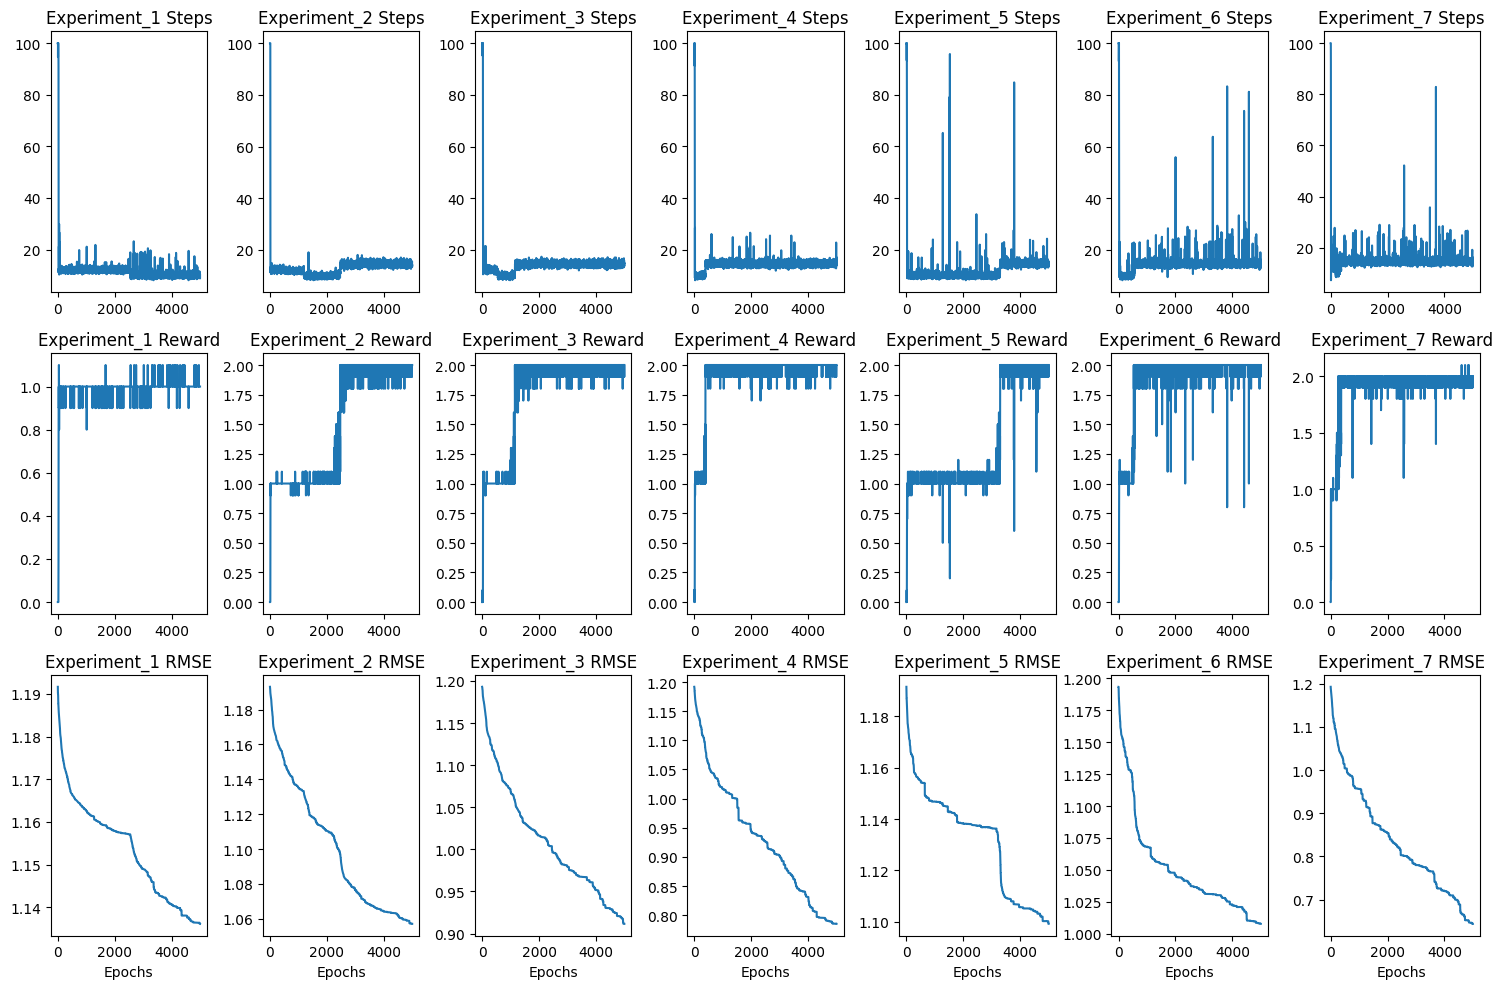

In [147]:
# Plot results
fig, axes = plt.subplots(3, len(hyperparameter_sets), figsize=(15, 10))
for i, (exp_name, exp_results) in enumerate(results.items()):
    axes[0, i].plot(np.arange(len(exp_results['steps'])), exp_results['steps'])
    axes[0, i].set_title(f"{exp_name} Steps")
    axes[1, i].plot(np.arange(len(exp_results['reward'])), exp_results['reward'])
    axes[1, i].set_title(f"{exp_name} Reward")
    axes[2, i].plot(np.arange(len(exp_results['RMSE'])), exp_results['RMSE'])
    axes[2, i].set_title(f"{exp_name} RMSE")
    axes[2, i].set_xlabel('Epochs')

plt.tight_layout()
plt.show()

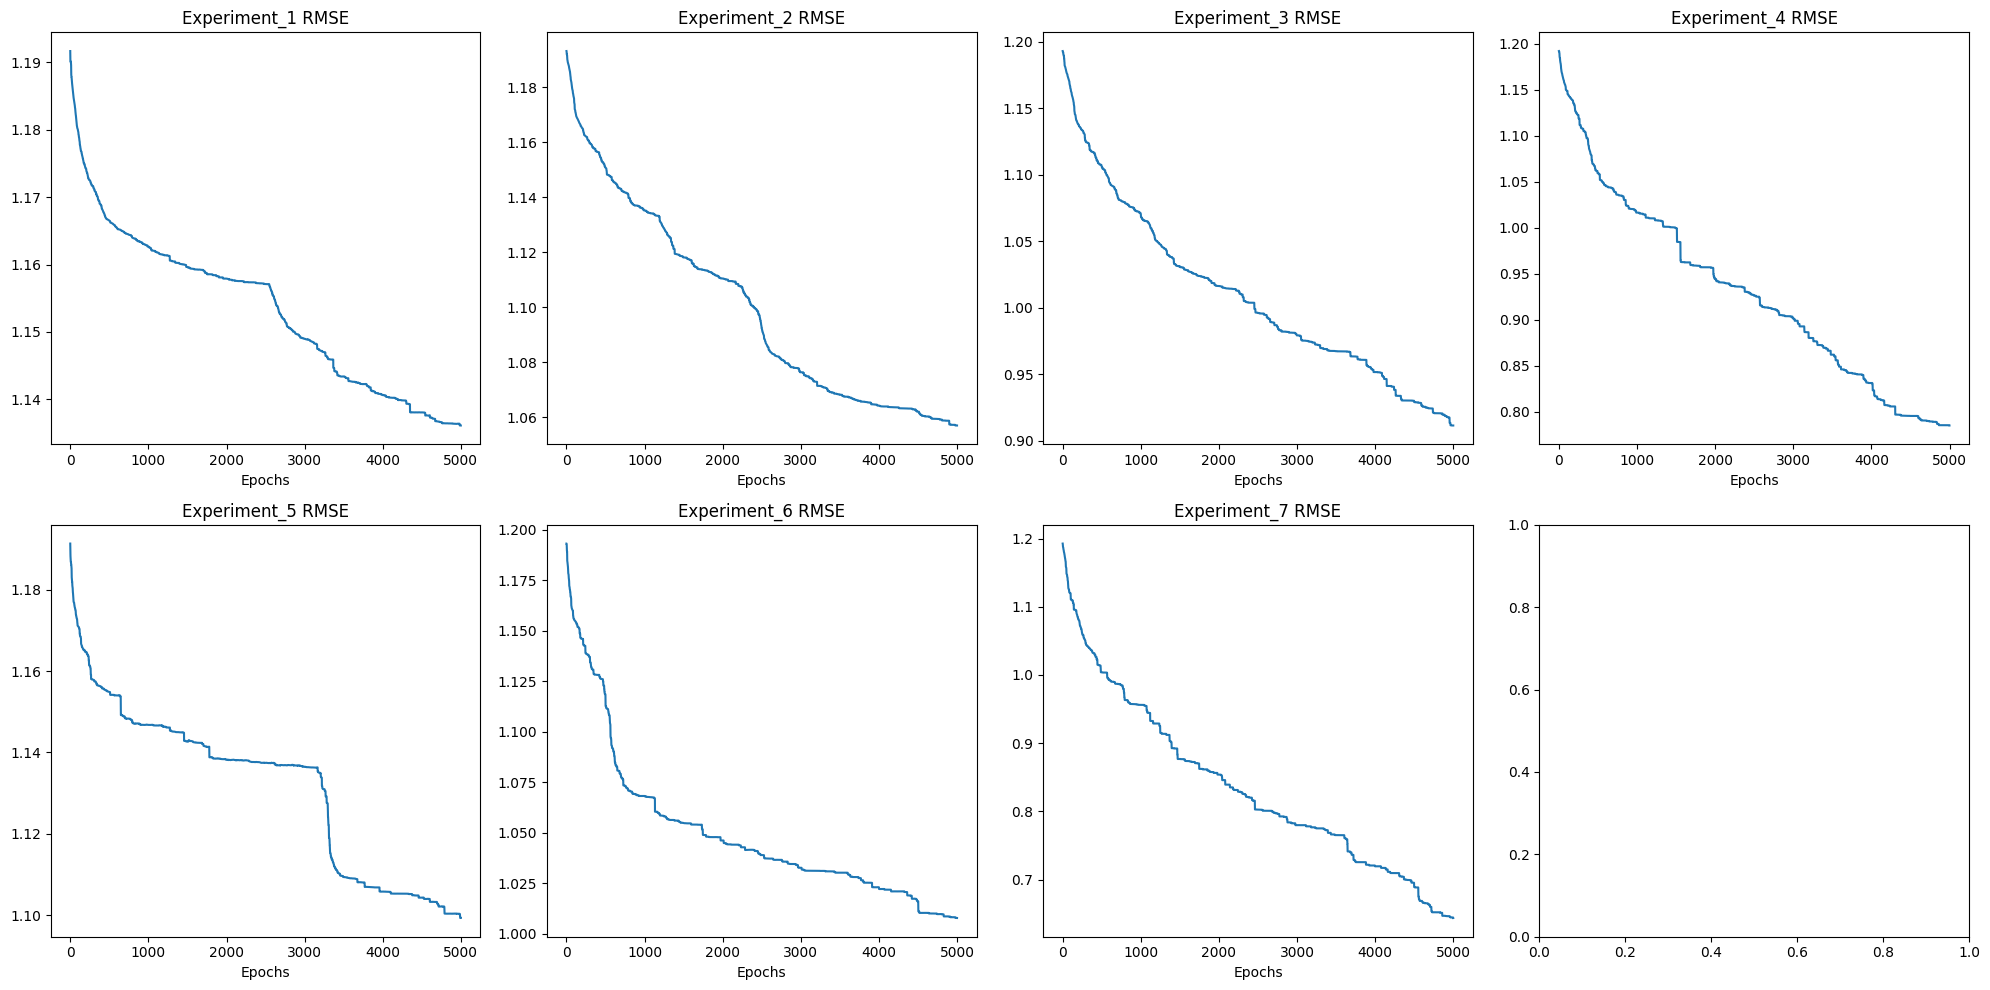

In [148]:
# Plot results for RMSE
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, (exp_name, exp_results) in enumerate(results.items()):
    row = i // 4
    col = i % 4
    axes[row, col].plot(np.arange(len(exp_results['RMSE'])), exp_results['RMSE'])
    axes[row, col].set_title(f"{exp_name} RMSE")
    axes[row, col].set_xlabel('Epochs')

plt.tight_layout()
plt.show()

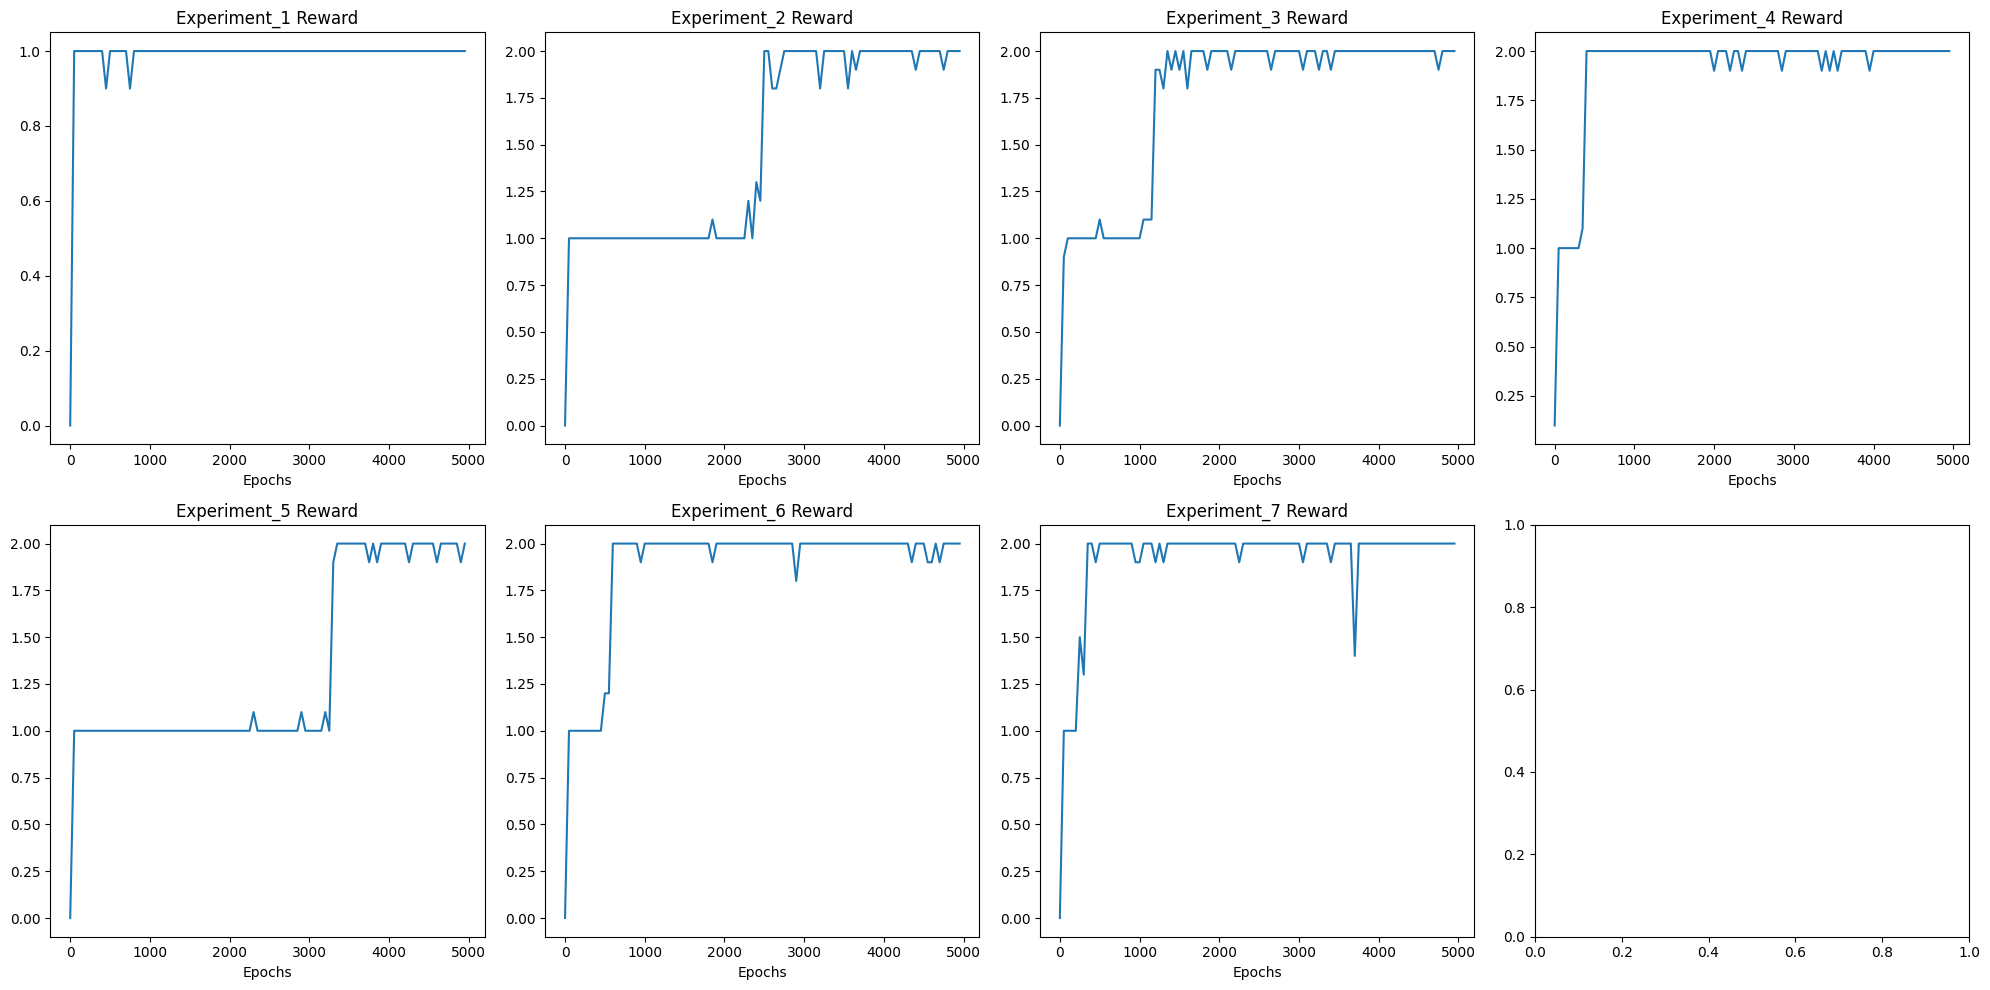

In [151]:
# Plot results for reward
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, (exp_name, exp_results) in enumerate(results.items()):
    row = i // 4
    col = i % 4
    epochs = np.arange(0, len(exp_results['reward']), 50)
    axes[row, col].plot(epochs, exp_results['reward'][::50])
    axes[row, col].set_title(f"{exp_name} Reward")
    axes[row, col].set_xlabel('Epochs')

plt.tight_layout()
plt.show()

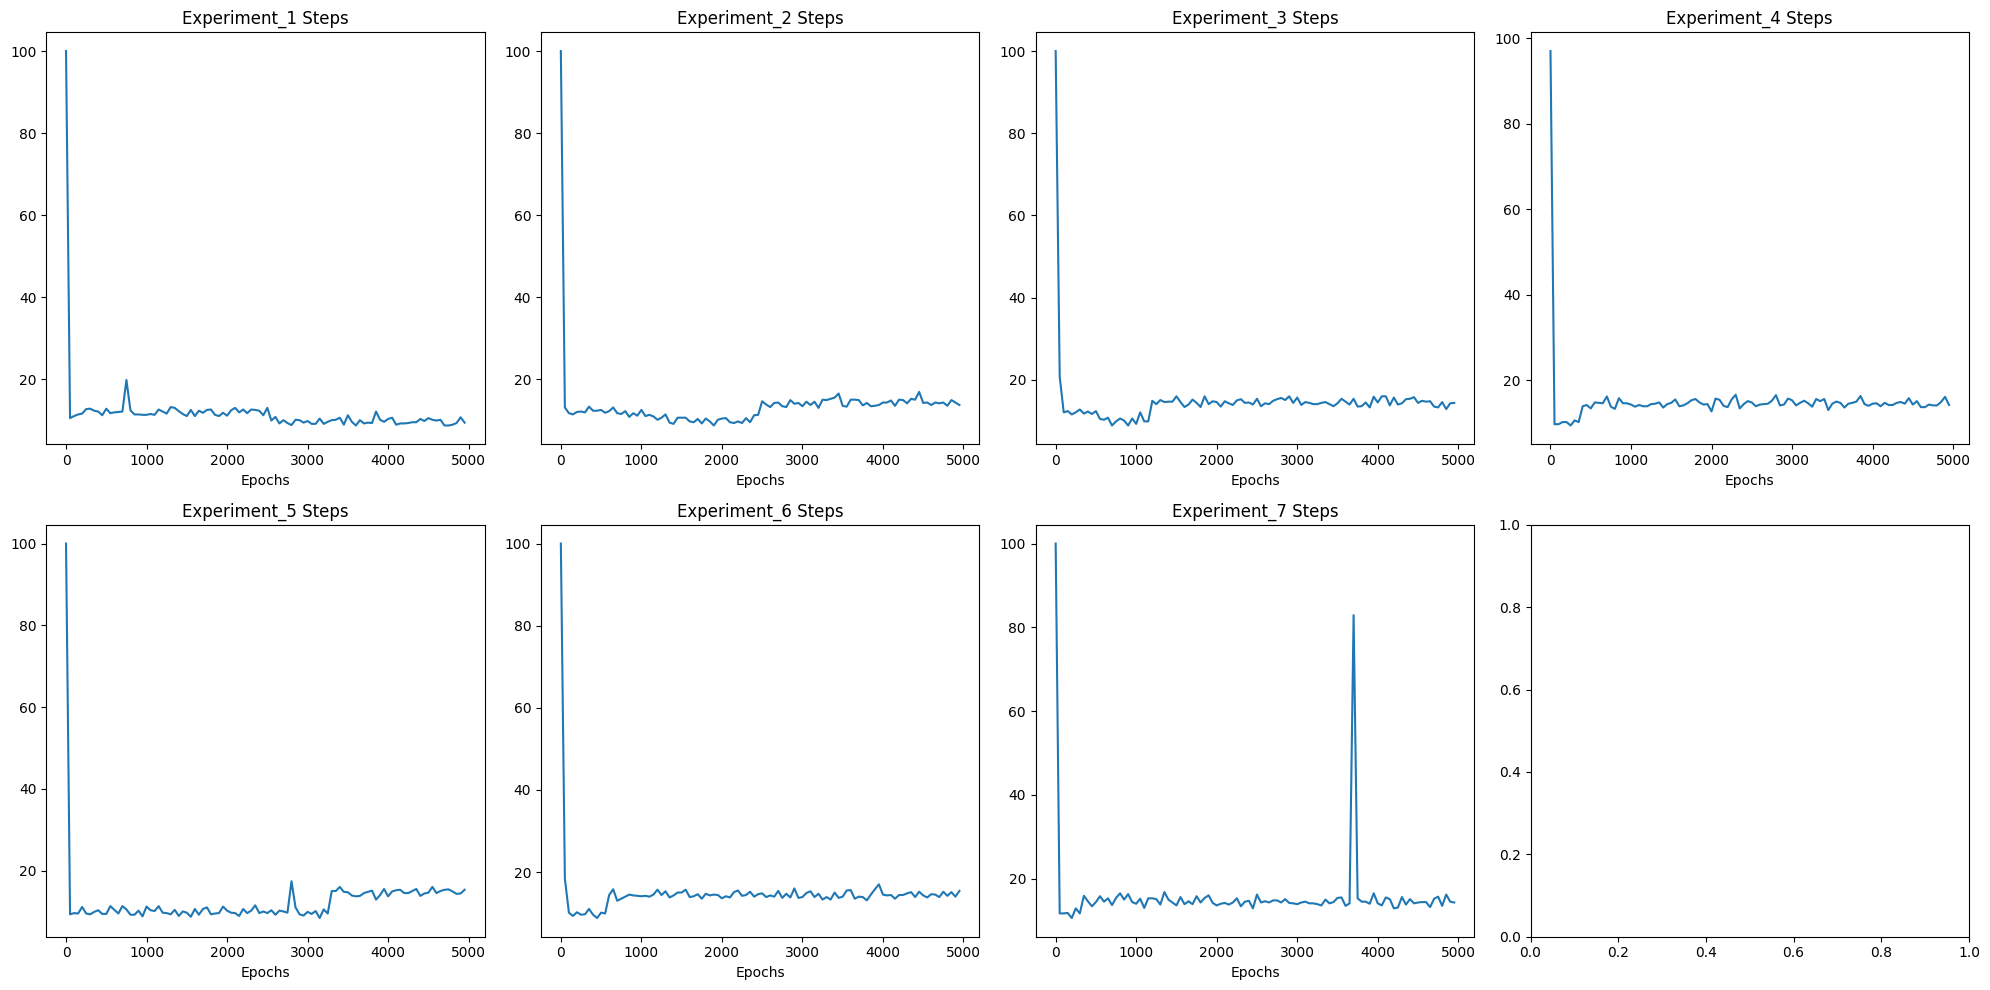

In [152]:
# Plot results for steps
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, (exp_name, exp_results) in enumerate(results.items()):
    row = i // 4
    col = i % 4
    epochs = np.arange(0, len(exp_results['steps']), 50)
    axes[row, col].plot(epochs, exp_results['steps'][::50])
    axes[row, col].set_title(f"{exp_name} Steps")
    axes[row, col].set_xlabel('Epochs')

plt.tight_layout()
plt.show()

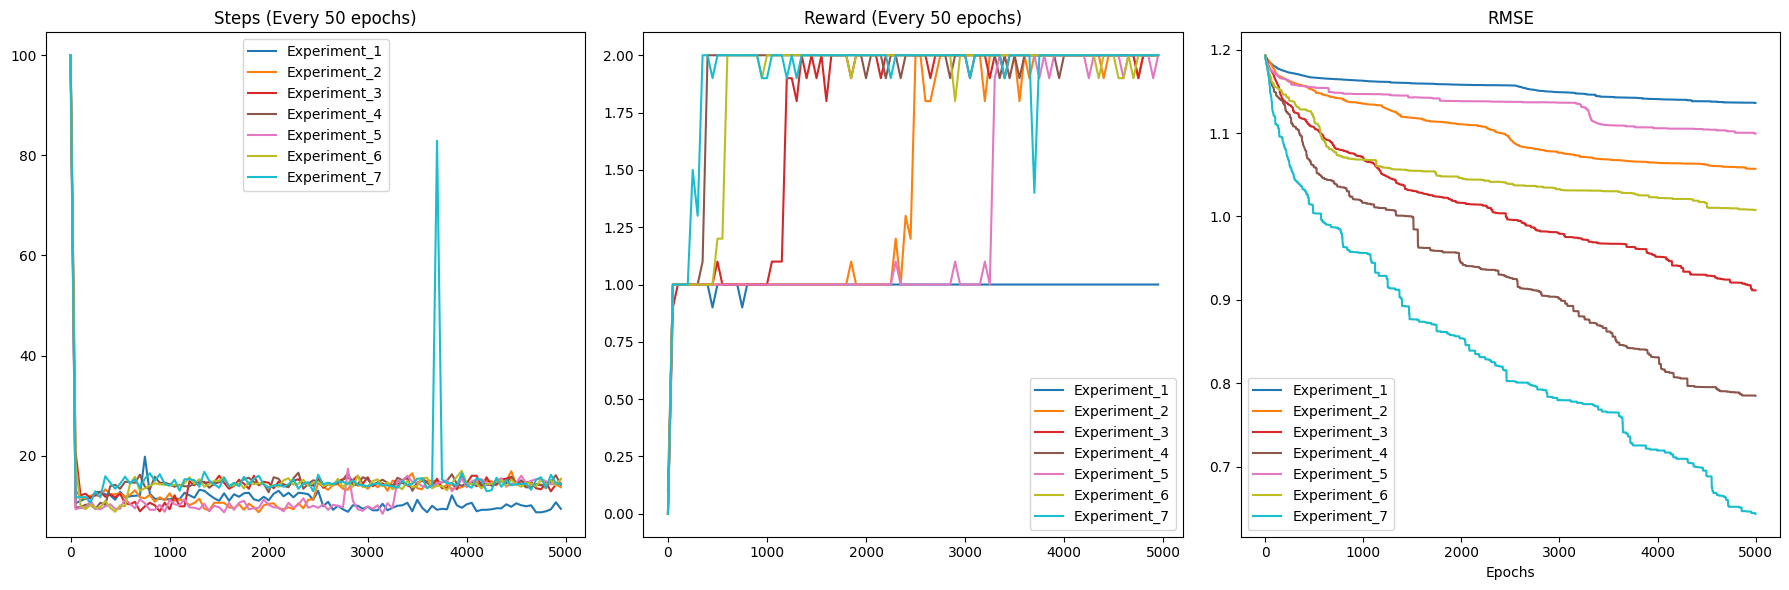

In [150]:
# Plot results for steps and reward
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define a color map for different experiments
colors = plt.cm.tab10(np.linspace(0, 1, len(results)))

for i, (exp_name, exp_results) in enumerate(results.items()):
    # Plot steps at every 50 epochs
    epochs_steps = np.arange(0, len(exp_results['steps']), 50)
    axes[0].plot(epochs_steps, exp_results['steps'][::50], label=exp_name, color=colors[i])
    # Plot reward
    epochs_reward = np.arange(0, len(exp_results['reward']), 50)
    axes[1].plot(epochs_reward, exp_results['reward'][::50], label=exp_name, color=colors[i])
    # Plot RMSE
    axes[2].plot(np.arange(len(exp_results['RMSE'])), exp_results['RMSE'], label=exp_name, color=colors[i])

# Set titles and labels
axes[0].set_title("Steps (Every 50 epochs)")
axes[1].set_title("Reward (Every 50 epochs)")
axes[2].set_title("RMSE")
axes[2].set_xlabel('Epochs')

# Add legends
axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.tight_layout()
plt.show()